In [ ]:
!pip install -U azure-quantum
!pip install -U azure-quantum[qiskit]
!pip install -U qiskit_machine_learning
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#making classifiable points
import numpy as np
import matplotlib.pyplot as plt
def clouds(num_points=100):
  centers = [(1,1), (-1,-1)]
  spreads = [0.5, 0.7]
  labels = [-1,1]
  X=[]
  y=[]
  for center, spread, label in zip (centers, spreads, labels):
    X+=np.random.multivariate_normal(center, spread*np.identity(2), num_points).tolist()
    y+=[label]*num_points
  return X, y 

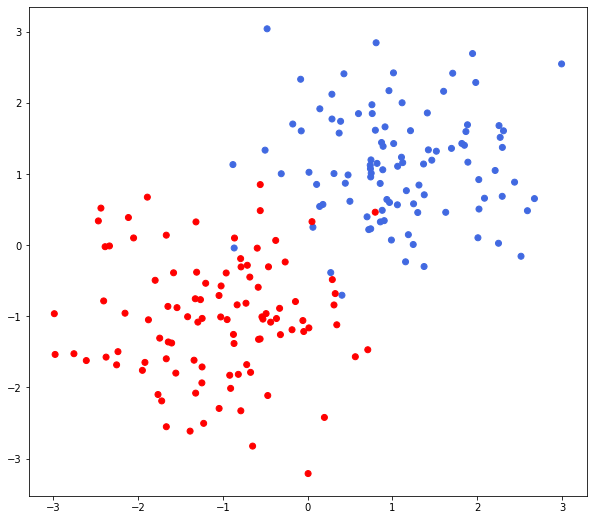

In [ ]:
points, labels= clouds(100)
colors=["red" if label ==1 else "royalblue" for label in labels]
plt.figure(figsize=(10,9))
plt.scatter(np.array(points)[:,0], np.array(points)[:,1], color=colors);

In [ ]:
#How SVM works in high level code
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model=SVC()
model.fit(points,labels)
sk_predict=model.predict(points)
accuracy = accuracy_score(labels, sk_predict)
print("Accuracy:", accuracy)

Accuracy: 0.97


##Lets code it same as its mathematical model

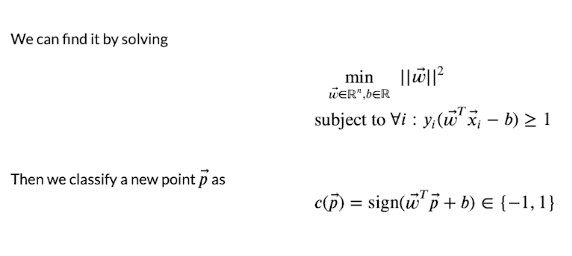

Where:
- x is a vector of features for a single training example
- w is a vector of weights for each feature
- b is the bias term
- y is the target output for a single training example, which can be -1 or 1
- C is a hyperparameter that controls the trade-off between maximizing the margin and minimizing the classification error
- The sign function returns -1 if the argument is negative, 0 if it is zero, and 1 if it is positive
- The || ||<sup>2</sup> notation represents the squared L2 norm of a vector
- The optimization problem seeks to find the values of w and b that minimize the loss function, subject to the constraint that all training examples are classified correctly or lie on the correct side of the decision boundary.
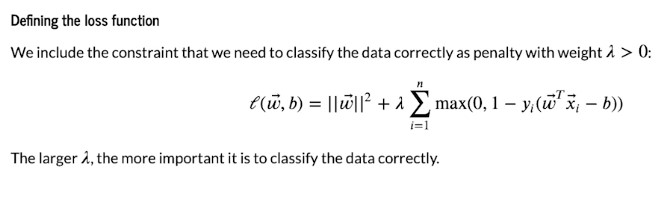




In [ ]:
def loss(support_vector, X, y, penalty=1e5):
  w= support_vector[1:]
  b= support_vector[0]
  norm=np.linalg.norm(w)**2
  constraint = sum(max(0,1-y[i]*(w.dot(X[i])-b)) for i , _ in enumerate(y))
  return norm + penalty * constraint

In [ ]:
from qiskit.algorithms.optimizers import L_BFGS_B
optimizer = L_BFGS_B()
result = optimizer.minimize(lambda sv: loss(sv, points, labels), x0=np.random.random(3))
support_vector=result.x

In [ ]:
def classify (point, support_vector):
  w=support_vector[1:]
  b=support_vector[0]
  return np.sign(w.dot(point)+b)

In [ ]:
predicted = [classify (point, support_vector) for point in points]

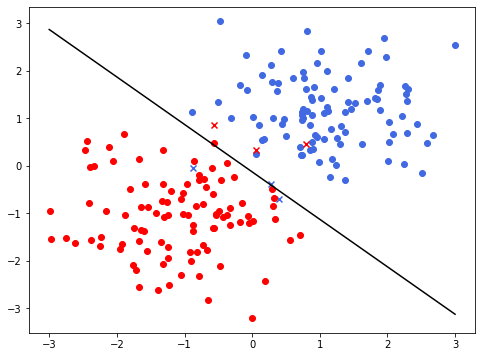

In [ ]:
colors = ["red" if label ==1 else "royalblue" for label in labels]
markers = ["o" if label == predicted_label else "x" for label, predicted_label in zip (labels, sk_predict)]
plt.figure(figsize=(8,6))

for point , marker, color in zip (points, markers, colors):
    plt.scatter(point[0], point[1], color=color, marker=marker)
b,w=support_vector[0], support_vector[1:]
x1=np.linspace(-3,3,num=100)
x2=-1/w[1]*(w[1]*x1+b)
plt.plot(x1, x2, "k-")

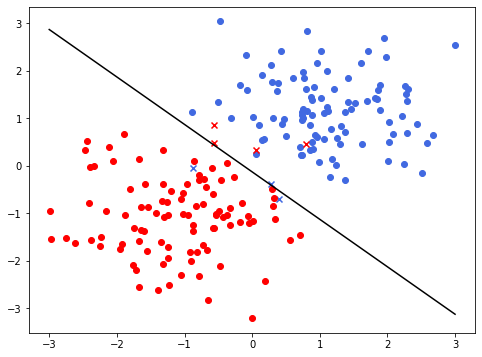

In [ ]:
colors = ["red" if label ==1 else "royalblue" for label in labels]
markers = ["o" if label == predicted_label else "x" for label, predicted_label in zip (labels, predicted)]
plt.figure(figsize=(8,6))
for point , marker, color in zip (points, markers, colors):
  plt.scatter(point[0], point[1], color=color, marker=marker)
b,w=support_vector[0], support_vector[1:]
x1=np.linspace(-3,3,num=100)
x2=-1/w[1]*(w[1]*x1+b)
plt.plot(x1, x2, "k-")

In [ ]:
correct_predictions = 0
for label, predicted_label in zip(labels, predicted):
  if label == predicted_label:
    correct_predictions += 1

accuracy = correct_predictions / len(labels)
print("Accuracy:", accuracy)

Accuracy: 0.965


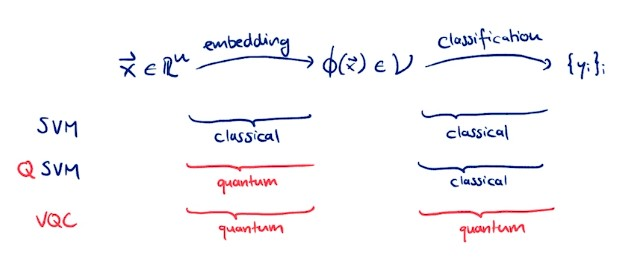

In [ ]:
def circle():
  num_points=120
  points=1-2*np.random.random((num_points,2))
  radius=0.6
  labels=[1 if np.linalg.norm(point) > radius else -1 for point in points]
  return points, labels

Text(0, 0.5, '$x_2$')

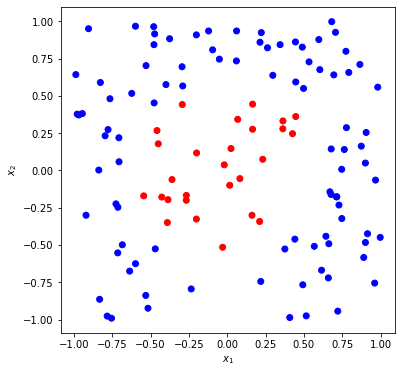

In [ ]:
points, labels = circle()
colors = ["blue" if label ==1 else "red" for label in labels]
plt.figure(figsize=(6,6))
plt.scatter(points[:,0], points[:,1], color=colors)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [ ]:
def feature_map(x):
  return np.array([x[0],x[1],x[0]**2+x[1]**2])

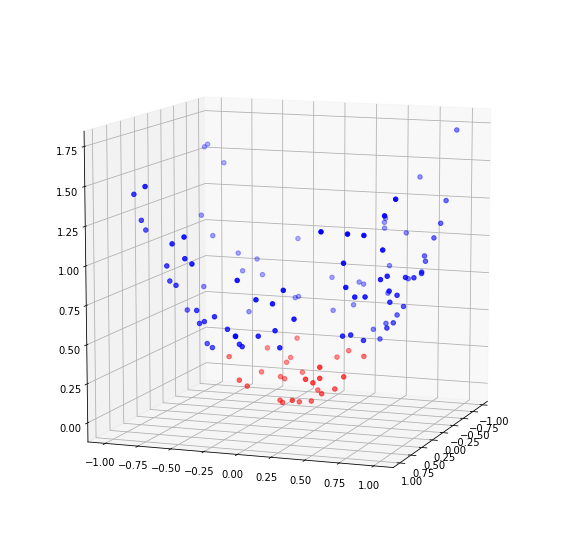

In [ ]:
embedded_points=np.array([feature_map(feature_map(feature_map(point))) for point in points])

fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')
ax.scatter(embedded_points[:,0],embedded_points[:,1],embedded_points[:,2],color=colors)
ax.view_init(10,20)

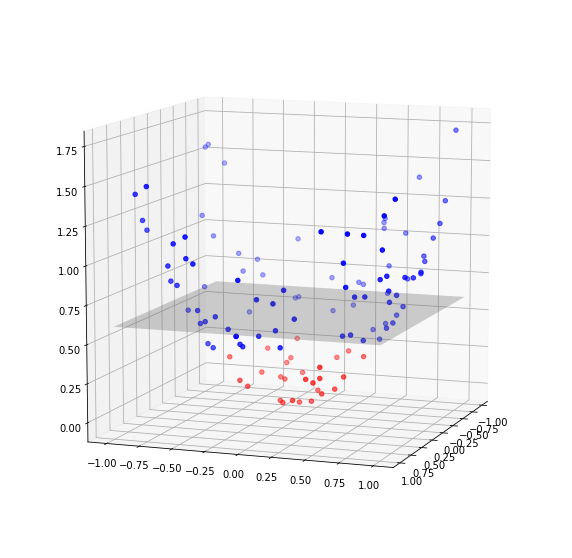

In [ ]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')
ax.scatter(embedded_points[:,0],embedded_points[:,1],embedded_points[:,2],color=colors)
x,y=np.meshgrid([1,-1],[1,-1])
ax.plot_surface(x,y,0.6*np.ones_like(x),alpha=0.3,color="grey")
ax.view_init(10,20)

Text(0, 0.5, '$x_2$')

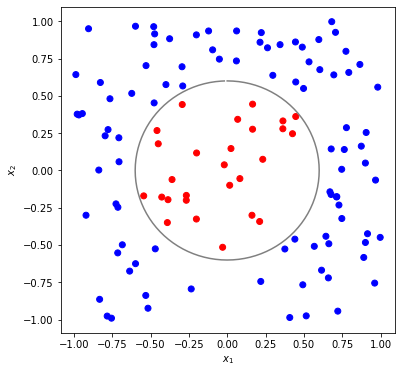

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(points[:,0],points[:,1],color=colors)
angles=np.linspace(0,2*np.pi,num=200,endpoint=False)
x=0.6*np.sin(angles)
y=0.6*np.cos(angles)
plt.plot(x,y,color="grey")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [ ]:
from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider (
    resource_id = "/subscriptions/2501e059-13d8-4207-85d6-ec58656e2fae/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/Rigetti",
    location = "eastus"
)

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())
from qiskit import *
from qiskit.utils import QuantumInstance

from azure.quantum import Workspace
"""
workspace = Workspace (
    subscription_id = "",
    resource_group = "",
    name = "",
)
"""

from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider (
    resource_id = "/subscriptions/2501e059-13d8-4207-85d6-ec58656e2fae/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/Rigetti",
    location = "eastus"
)

# Create IonQ simulator and QPU backends
ionq_simulator_backend = provider.get_backend("ionq.simulator")
ionq_qpu_backend = provider.get_backend("ionq.qpu")

# Create Rigetti simulator and QPU backends
rigetti_simulator_backend = provider.get_backend("rigetti.sim.qvm")
rigetti_qpu_backend = provider.get_backend("rigetti.qpu.aspen-m-3")

# Create Quantinuum simulator and QPU backends
Quantinuum_simulator_backend = provider.get_backend("quantinuum.sim.h1-2sc")
Quantinuum_qpu_backend = provider.get_backend("quantinuum.qpu.h1-2")

#backend = rigetti_simulator_backend
#from qiskit import QuantumCircuit, execute, Aer
#backend = Aer.get_backend('qasm_simulator')

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.


This workspace's targets:


To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code RDNDTK5AZ to authenticate.


Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.


- ionq.qpu
- ionq.qpu.aria-1
- ionq.simulator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim
- quantinuum.qpu.h1-1
- quantinuum.sim.h1-1sc
- quantinuum.qpu.h1-2
- quantinuum.sim.h1-2sc
- quantinuum.sim.h1-1e
- quantinuum.sim.h1-2e
- rigetti.sim.qvm
- rigetti.qpu.aspen-11
- rigetti.qpu.aspen-m-2
- rigetti.qpu.aspen-m-3
- microsoft.estimator


To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code FRZQHYLRQ to authenticate.


In [ ]:
from qiskit import QuantumCircuit, execute, Aer
backend = Aer.get_backend('qasm_simulator')

In [ ]:
print(backend)

qasm_simulator


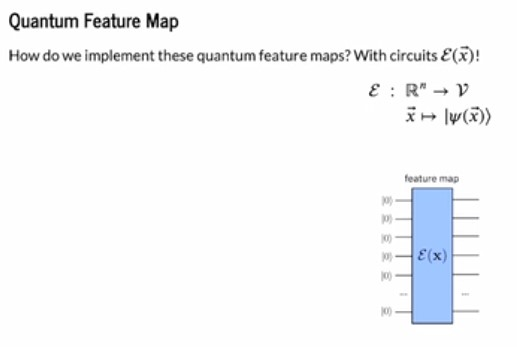

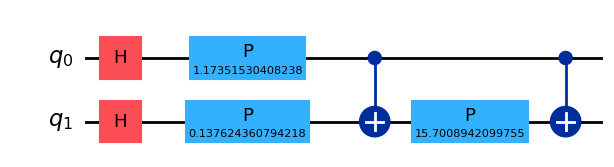

In [ ]:
#QSVM Feature Map
from qiskit.circuit.library import ZZFeatureMap
num_qubits=2
x=np.random.random(num_qubits)
data=ZZFeatureMap(feature_dimension=num_qubits, reps=1,entanglement="linear")
data.assign_parameters(x,inplace=True)
data.decompose().draw("mpl", style="iqx", scale=1.4)

In [ ]:
from qiskit import transpile, BasicAer, QuantumCircuit
backend = BasicAer.get_backend("qasm_simulator")
#backend = rigetti_simulator_backend
#backend = ionq_simulator_backend 
#backend  = Quantinuum_simulator_backend
shots =1024
dimension =2 
feature_map=ZZFeatureMap(dimension, reps=1)
def evaluate_kernel(x_i, x_j):
  circuit = QuantumCircuit(dimension)
  circuit.compose(feature_map.assign_parameters(x_i), inplace=True)
  circuit.compose(feature_map.assign_parameters(x_j).inverse(), inplace=True)
  circuit.measure_all()
  transpiled=transpile(circuit, backend)
  job=backend.run(transpiled, shots=shots)
  result=job.result()
  counts=result.get_counts(transpiled)
  return counts.get("0"*dimension, 0)/shots

In [ ]:
#Lets compare our implementation with original implementation
evaluate_kernel(points[2],points[3])

0.0537109375

In [ ]:
print(data)

     ┌─────────────────────────────────────────────────────┐
q_0: ┤0                                                    ├
     │  ZZFeatureMap(0.586757652041189,0.0688121803971088) │
q_1: ┤1                                                    ├
     └─────────────────────────────────────────────────────┘


In [ ]:
#IBM original Implementation
backend = BasicAer.get_backend("qasm_simulator")
#backend = rigetti_simulator_backend
#backend = ionq_simulator_backend 
#backend  = Quantinuum_simulator_backend
from qiskit_machine_learning.kernels import QuantumKernel
kernel=QuantumKernel(feature_map, quantum_instance=backend)
kernel.evaluate(points[2],points[3])

array([[0.05566406]])

In [ ]:
qsvm=SVC(kernel=kernel.evaluate)
qsvm.fit(points,labels)
predicted=qsvm.predict(points)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(labels, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.9916666666666667


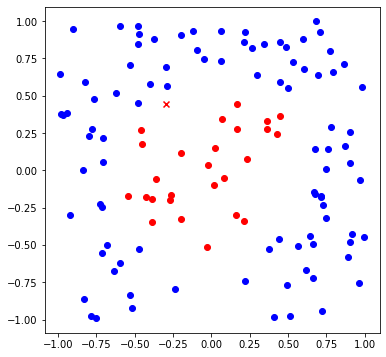

In [ ]:
markers = ["o" if label ==predicted_label else "x" for label, predicted_label in zip(labels,predicted)]
plt.figure(figsize=(6,6))
for point, marker, color in zip(points.tolist(),markers,colors):
  plt.scatter(point[0],point[1],color=color,marker=marker)

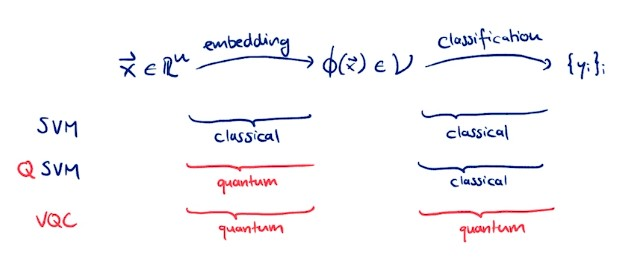

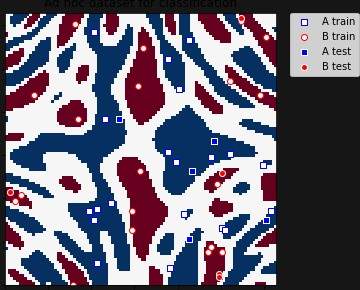

In [ ]:
#vqc
backend=BasicAer.get_backend("qasm_simulator")

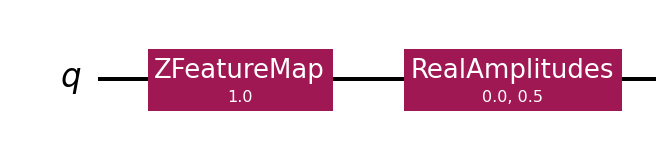

In [ ]:
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap
import numpy as np

num_features = 1
feature_map=ZFeatureMap(num_features)
model = RealAmplitudes(num_features, reps=1, entanglement="pairwaise")
circuit = feature_map.compose(model)
data=np.array([1])
angles = np.arange(model.num_parameters)/model.num_parameters
bound = circuit.bind_parameters(np.concatenate((data,angles)))
bound.draw("mpl",style="iqx",scale=2)

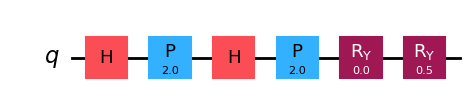

In [ ]:
bound.decompose().draw("mpl", style="iqx", scale=1.4)

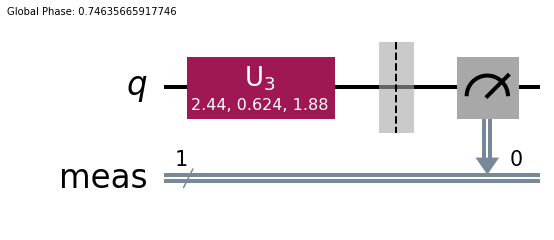

In [ ]:
from qiskit.compiler import transpile

bound.measure_all()


transpiled = transpile(bound, backend)

transpiled.draw("mpl",style="iqx",scale=2)


{'1': 891, '0': 133}


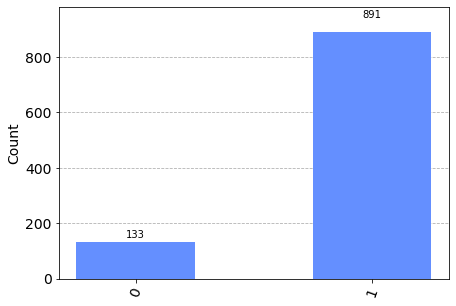

In [ ]:
from qiskit.visualization import plot_histogram

job=backend.run(transpiled, shots=1024)
result=job.result()
counts=result.get_counts(transpiled)
print(counts)
plot_histogram(counts)

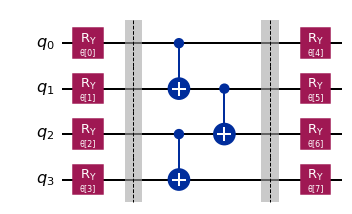

In [ ]:
from qiskit.circuit.library import RealAmplitudes, EfficientSU2
ansatz = RealAmplitudes(num_qubits=4, reps=1,entanglement="pairwise", insert_barriers=True)
ansatz.decompose().draw("mpl",style="iqx")


In [ ]:
def parity(bitstring):
  #return 1 if there's an even number of 1's , otherwise return -1
  return 1 if bitstring.count("1") %2 else -1
labels = {parity(bitstring): count /1000 for bitstring, count in counts.items()}
print(labels)

{1: 0.891, -1: 0.133}


Text(0, 0.5, '$x_2$')

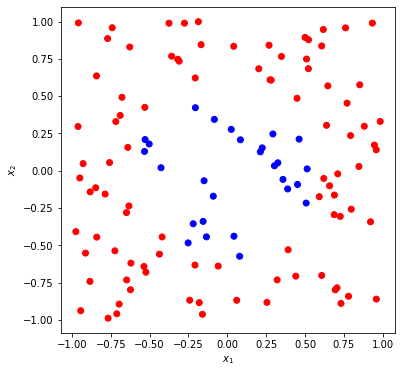

In [ ]:
points, labels = circle()
colors = ["red" if label== 1 else "blue" for label in labels]
plt.figure(figsize=(6,6))
plt.scatter(points[:,0],points[:,1],color=colors)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

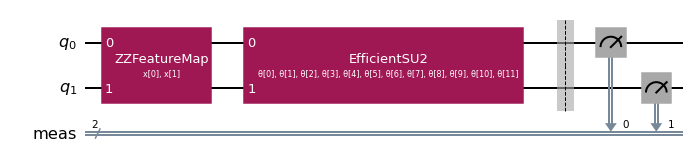

In [ ]:
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap, EfficientSU2

num_features =2
feature_map=ZZFeatureMap(num_features,reps=3)
model=EfficientSU2(num_features, reps=2, entanglement="pairwise")
circuit=feature_map.compose(model)
circuit.measure_all()
circuit.draw("mpl",style="iqx")

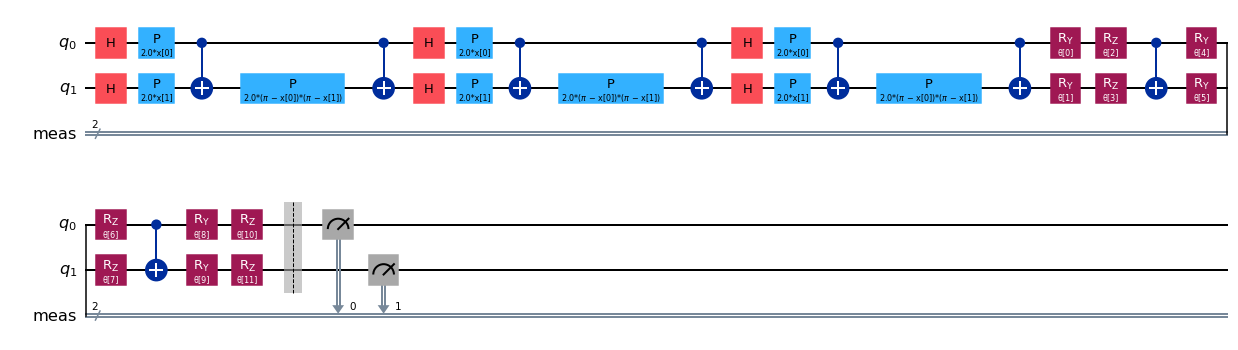

In [ ]:
circuit.decompose().draw("mpl", style="iqx")

In [ ]:
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap, EfficientSU2
from qiskit.result.mitigation.utils import counts_probability_vector
from qiskit.algorithms.optimizers import COBYLA
from qiskit.result import counts
num_features =2
feature_map=ZZFeatureMap(num_features,reps=3)
model=EfficientSU2(num_features, reps=2, entanglement="pairwise")
circuit=feature_map.compose(model)
circuit.measure_all()


backend=BasicAer.get_backend("qasm_simulator")
cutoff=1e-10
shots=1024
transpiled=transpile(circuit,backend)


def predict(theta, point, return_probabilities=False):
  bound = transpiled.assign_parameters(np.concatenate((point, theta)))

  job=backend.run(bound, shots=shots)
  result=job.result()
  counts=result.get_counts()
  #counts=result.get_counts(transpiled)
  pr_1=0
  for bitstr , count in counts.items():
    if parity(bitstr)==1:
      pr_1+=count/shots
  if return_probabilities:
    return pr_1
  return 1 if pr_1>0.5 else 0

def safe_log(value):
  return np.log(max(cutoff,value))

def loss(theta, X, y):
  loss_value=0
  for X_i, y_i in zip(X,y):
    pr_1=predict(theta, X_i,return_probabilities=True)
    loss_value -=y_i*safe_log(pr_1)+(1-y_i)*safe_log(1-pr_1)
  return loss_value

one_zero_labels=(1+np.array(labels))/2
cost=lambda theta: loss(theta, points, one_zero_labels.tolist())

x0=np.random.random(model.num_parameters)
cobyla = COBYLA()
result = cobyla.minimize(cost, x0=x0)


In [ ]:
predictions = [predict(result.x,X_i) for X_i in points.tolist()]

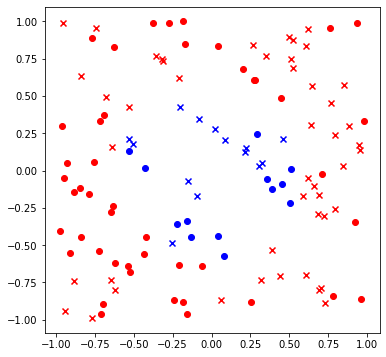

In [ ]:
markers=["o" if label ==predicted_label else "x" for label, predicted_label in zip(one_zero_labels,predictions)]
plt.figure(figsize=(6,6))
for point, marker, color in zip(points.tolist(),markers,colors):
  plt.scatter(point[0], point[1], color=color, marker=marker)

In [ ]:
from qiskit_machine_learning.algorithms import VQC
vqc = VQC(num_qubits, feature_map, model, quantum_instance=backend)
one_hot=np.array([[1,0] if label == 1 else [0,1] for label in labels])
vqc.fit(points,one_hot)
vqc_predictions=vqc.predict(points)

In [ ]:
vqc.score(vqc_predictions,one_hot)

0.825